# Handwritten Digit recognition using CNN

# import the libararies

In [9]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing data

In [10]:
num_classes=10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Create the model

![image.png](attachment:image.png)

This code defines a convolutional neural network (CNN) architecture for the MNIST dataset, suitable for image classification tasks. The model consists of convolutional layers, pooling layers, dropout layers, and fully connected layers, and is compiled with appropriate loss function, optimizer, and metrics.

Understanding the default values of the parameters in different functions calls will help you.

<b>Hyperparameter Setting</b>: <br>
`batch_size`: <br>
Determines the number of samples processed in a single batch during training. A larger batch size can speed up training but might require more memory. <br>

`num_classes`: <br>
Specifies the number of output classes, which is 10 for the MNIST dataset (digits 0-9). <br>

`epochs`: <br>
Defines the number of times the entire dataset is passed through the network during training.

<b>Model Architecture</b>: <br>
`Sequential Model`: <br>
Creates a sequential model, where layers are added sequentially. <br>

<b>Convolutional Layers</b>: <br>
`Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)`:<br>
* Adds a 2D convolutional layer with 32 filters, each of size 3x3.
* ses the ReLU activation function to introduce non-linearity.
* Specifies the input shape of the images (it's already defined).

`Conv2D(64, (3, 3), activation='relu')`: <br>
Adds another convolutional layer with 64 filters of size 3x3, also using ReLU activation. <br>

<b>Pooling Layer</b>: <br>
`MaxPooling2D(pool_size=(2, 2))`: <br>
Downsamples the feature maps by taking the maximum value in 2x2 patches. This reduces the dimensionality and computational cost. <br>

<b>Dropout Layer</b>: <br>
`Dropout(0.25)`: <br>
Randomly sets 25% of the input units to 0 during training. This helps prevent overfitting by introducing noise and making the model more robust. <br>

<b>Flatten Layer</b>: <br>
Flattens the 2D feature maps into a 1D vector. <br>

<b>Dense Layers</b>: <br>
`Dense(256, activation='relu')`: <br>
Adds a fully connected layer with 256 units, using ReLU activation. <br>

`Dense(num_classes, activation='softmax')`: <br>
Adds a final fully connected layer with 10 units (equal to the number of classes) and uses the softmax activation function to produce probability distributions for each class. <br>

<b>Model Compilation</b>: <br>
<b>Loss Function</b>: <br>
`keras.losses.categorical_crossentropy` is used as the loss function, which is appropriate for multi-class classification problems. <br>

<b>Optimizer</b>:  <br>
`keras.optimizers.Adadelta()` is used as the optimization algorithm. Adadelta is an adaptive learning rate algorithm that automatically adjusts the learning rate during training. <br>

<b>Metrics</b>: <br>
`accuracy` is used as the metric to evaluate the model's performance.

In [11]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta


batch_size = 128
num_classes = 10
epochs = 10
# START YOUR CODE HERE
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])
# END YOUR CODE HERE

# Train the model

In [12]:
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 167s 352ms/step - accuracy: 0.1241 - loss: 2.2899 - val_accuracy: 0.4609 - val_loss: 2.2273
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 360ms/step - accuracy: 0.2701 - loss: 2.2209 - val_accuracy: 0.6220 - val_loss: 2.1398
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 346ms/step - accuracy: 0.4035 - loss: 2.1367 - val_accuracy: 0.6821 - val_loss: 2.0237
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 351ms/step - accuracy: 0.5074 - loss: 2.0215 - val_accuracy: 0.7338 - val_loss: 1.8629
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 348ms/step - accuracy: 0.5805 - loss: 1.8622 - val_accuracy: 0.7725 - val_loss: 1.6489
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 165s 353ms/step - accuracy: 0.6279 - loss: 1.6618 - val_accuracy: 0.7946 - val_loss: 1.3979
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 348ms/step - accuracy: 0.6625 - loss: 1.4467 - val_accuracy: 0.8082 - val_loss: 1.1545
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 344ms/step - accuracy: 0.6856 -

The model has successfully trained
Saving the model as mnist.h5


# Evaluate the model

The code snippet evaluates the trained CNN model on the test dataset and prints the test loss and accuracy. These metrics provide insights into the model's performance and help assess its ability to generalize to unseen data.

`score = model.evaluate(x_test, y_test, verbose=0)`:

* `model.evaluate`: <br>
This function evaluates the model's performance on a given dataset.

* `x_test`: <br>
The input data (images) from the test set.

* `y_test`: <br>
The corresponding true labels for the test set.

* `verbose=0`: <br>
This argument suppresses the progress bar that is typically displayed during evaluation, making the output more concise.

* The function returns a list containing the loss value and any specified metrics. In this case, since we've specified `metrics=['accuracy']`, the list will contain the test loss and test accuracy.

`print('Test loss:', score[0])`: <br>
This line prints the test loss, which is the first element in the score list. It indicates how well the model predicts the correct class for the test data. A lower loss value generally indicates better performance.

`print('Test accuracy:', score[1])`: <br>
This line prints the test accuracy, which is the second element in the score list. It represents the percentage of correct classifications on the test set. A higher accuracy indicates better performance.

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.710922122001648
Test accuracy: 0.8417999744415283


In [14]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,142,816 (27.25 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,761,878 (18.17 MB)

# Create GUI to predict digits

In [ ]:
# from keras.models import load_model
# from tkinter import *
# import tkinter as tk
# import win32gui
# from PIL import ImageGrab, Image
# import numpy as np

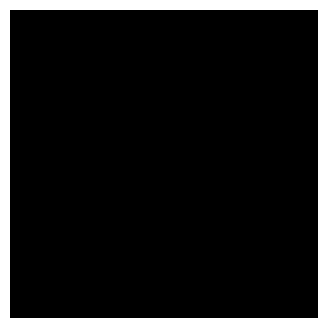

Button(description='Recognize', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())

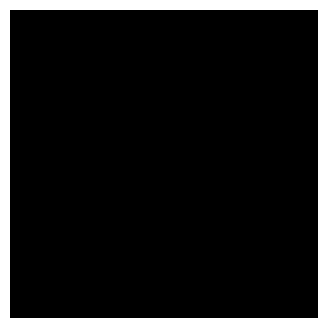

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted Digit: 5, Confidence: 10%


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image, ImageOps
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the trained model
model = load_model('mnist.h5')

# Global variable for canvas data
canvas_data = np.zeros((28, 28), dtype=np.float32)

# Function to predict the digit from the drawn image
def predict_digit(img):
    # Resize image to 28x28 pixels
    img = img.resize((28, 28))
    # Convert RGB to grayscale
    img = img.convert('L')
    img = np.array(img)
    # Reshaping to support our model input and normalizing
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0
    # Predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

# Function to draw on the canvas
def on_mouse_move(event):
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)
        if 0 <= x < 28 and 0 <= y < 28:
            canvas_data[y, x] = 1.0
            update_canvas()

# Function to update the canvas display
def update_canvas():
    plt.imshow(canvas_data, cmap='gray')
    plt.axis('off')
    clear_output(wait=True)
    display(plt.gcf())

# Function to clear the canvas
def clear_canvas(_):
    global canvas_data
    canvas_data = np.zeros((28, 28), dtype=np.float32)
    update_canvas()

# Function to classify the digit drawn on the canvas
def classify_handwriting(_):
    img = Image.fromarray((canvas_data * 255).astype(np.uint8)).convert('L')
    digit, acc = predict_digit(img)
    print(f"Predicted Digit: {digit}, Confidence: {int(acc * 100)}%")

# Create the drawing canvas using matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
canvas_data = np.zeros((28, 28), dtype=np.float32)
fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# Display the canvas
update_canvas()

# Add buttons for classification and clearing the canvas
btn_predict = widgets.Button(description="Recognize")
btn_predict.on_click(classify_handwriting)

btn_clear = widgets.Button(description="Clear")
btn_clear.on_click(clear_canvas)

# Display the buttons
display(btn_predict, btn_clear)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


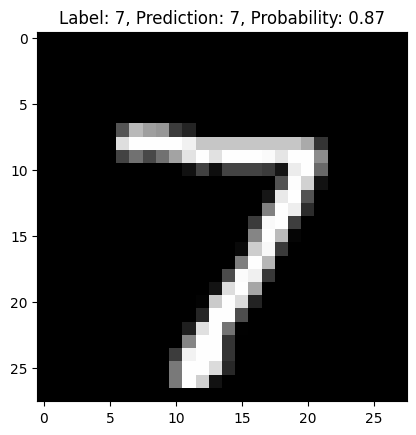

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


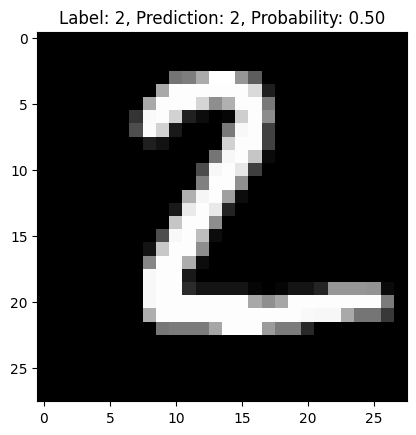

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


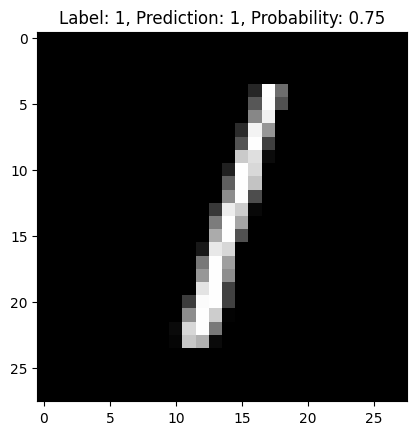

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


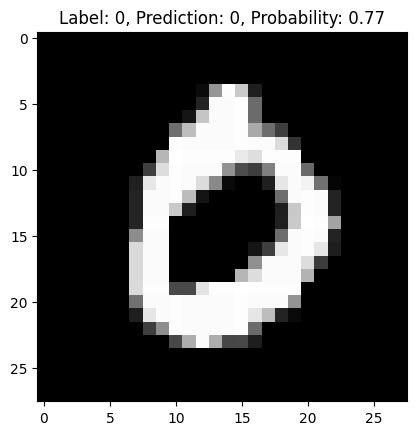

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


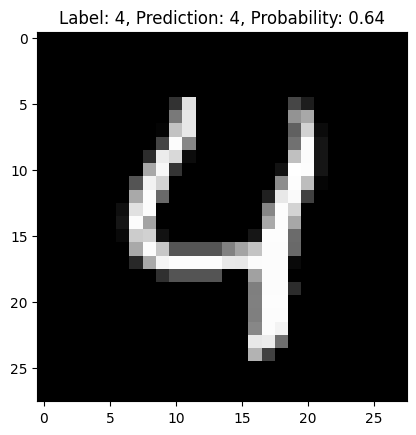

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


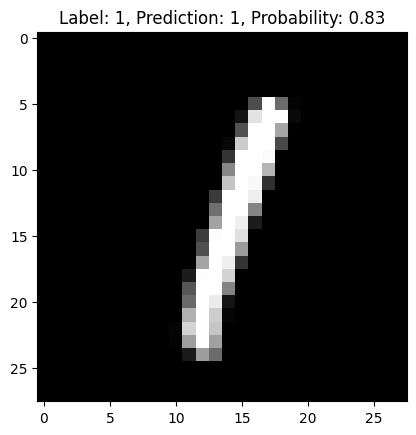

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


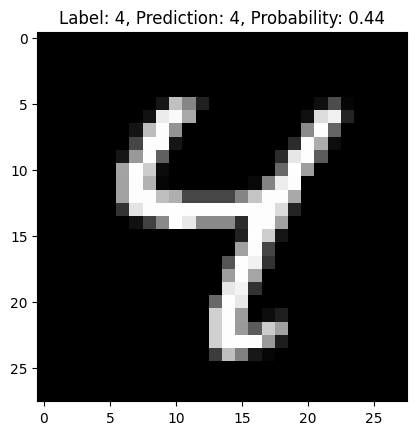

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


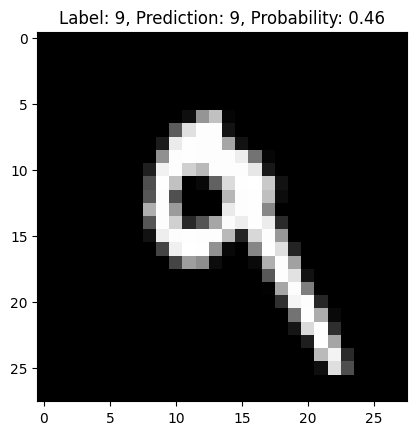

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


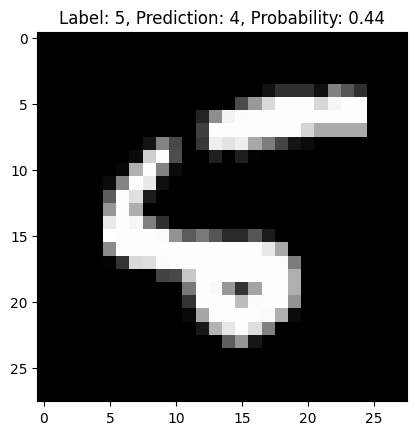

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


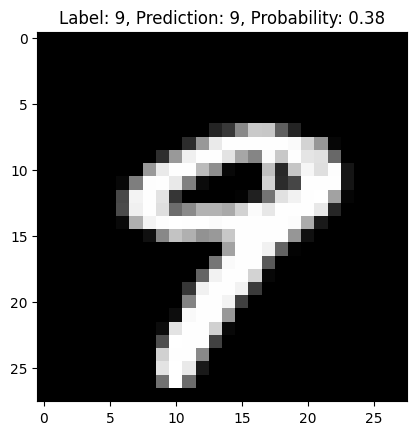

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('mnist.h5')

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = np.expand_dims(x_test, -1) / 255.0  # Normalize and add channel dimension

# Test the model with some test images
for i in range(10):
    img = x_test[i]
    label = y_test[i]
    img = np.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img)[0]
    predicted_class = np.argmax(prediction)
    probability = np.max(prediction)

    # Plot the image and prediction
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.title(f'Label: {label}, Prediction: {predicted_class}, Probability: {probability:.2f}')
    plt.show()
